In [2]:
#predict the airline passenger's ticket sales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

import warnings
warnings.filterwarnings('ignore')

In [3]:
air = pd.read_excel('C:\\Users\\deepa\\Downloads\\Airlines+Data.xlsx')
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<Axes: >

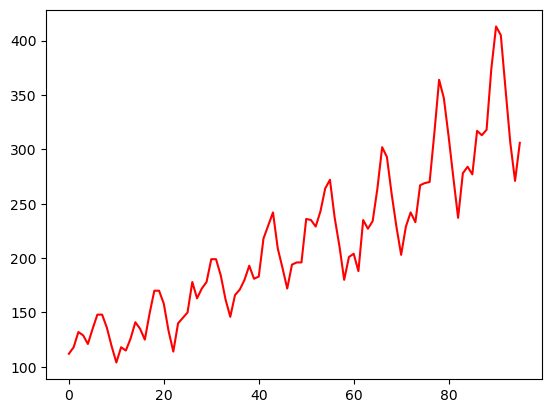

In [7]:
#Basic visualization to identify the past trend and perform analytics on the dataset
air.Passengers.plot(color='r')

<Axes: ylabel='Density'>

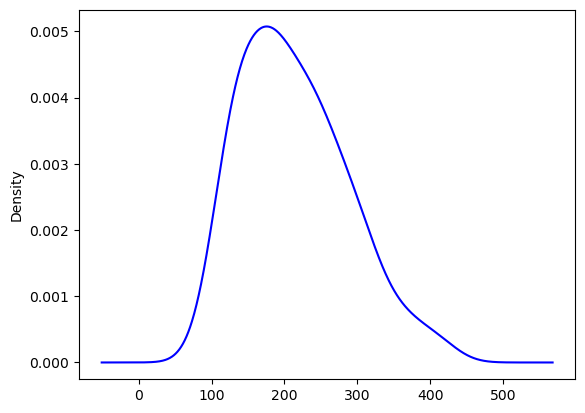

In [9]:
air.Passengers.plot(kind='kde',color='blue')

<Axes: ylabel='Frequency'>

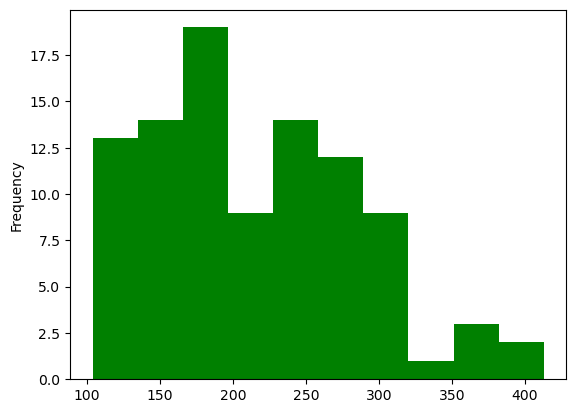

In [10]:
air.Passengers.plot(kind='hist',color='g')

In [12]:
temp=pd.read_excel('C:\\Users\\deepa\\Downloads\\Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

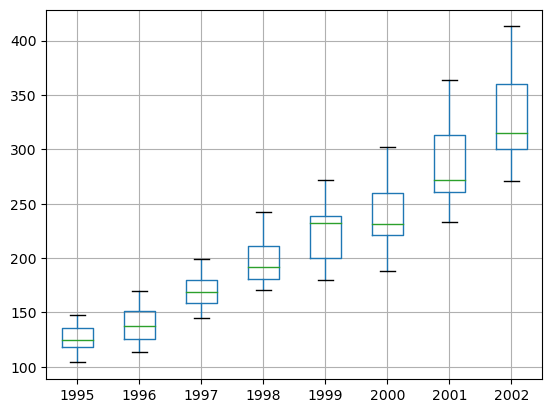

In [13]:
group=temp.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

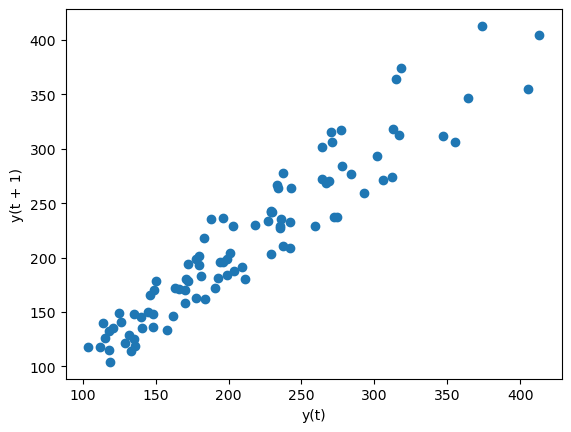

In [14]:
lag_plot(temp)

In [16]:
# SPLITTING THE DATASET FOR TRAIN AND TEST
train = air.head(77)
test =  air.tail(19)

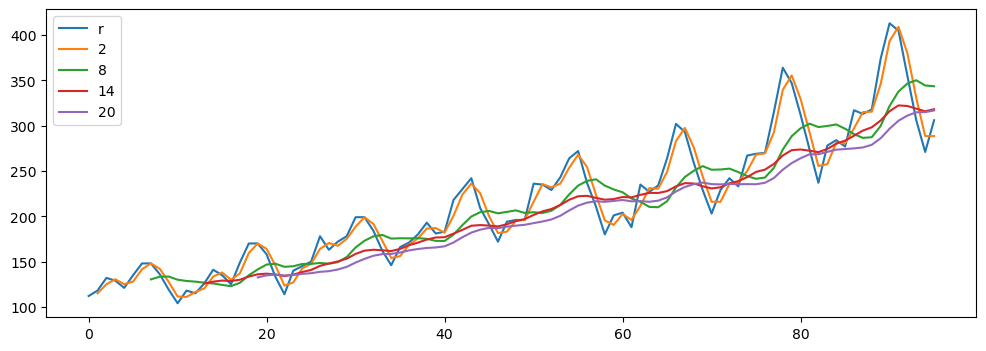

In [18]:
#Moving Average and time decomposition plot
plt.figure(figsize=(12,4))
air.Passengers.plot(label="r")
for i in range(2,24,6):
  air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

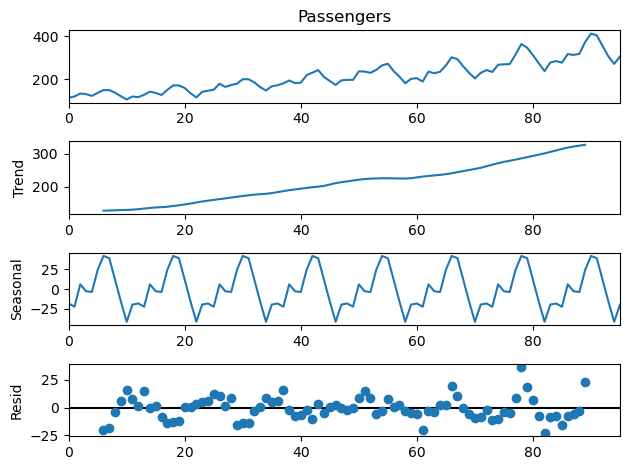

In [20]:
decompose_ts_add = seasonal_decompose(air.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

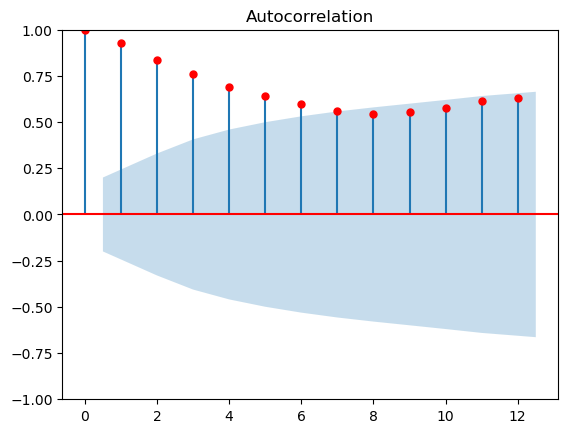

In [21]:
#ACF plots and PACF plots- To identify the significant features that contribute to forecast
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12,color='red')
plt.show()

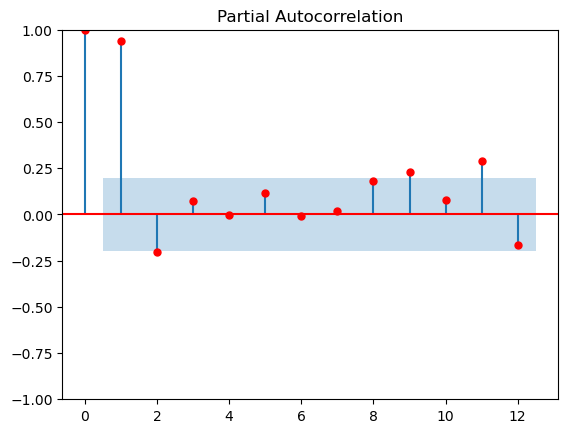

In [23]:
tsa_plots.plot_pacf(air.Passengers,lags=12,color='red')
plt.show()

In [24]:
# Creating a user defined function- to calculate the RMSE value
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

In [25]:
#data driven models 1)Simple exponential method
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
r1=RMSE(pred_ses,test.Passengers) 
r1

80.54332901444145

In [26]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
r2=RMSE(pred_hw,test.Passengers) 
r2

47.87772864030438

In [27]:
# 3)Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
r3=RMSE(pred_hwe_add_add,test.Passengers) 
r3

35.906424630992824

In [28]:
# 4)Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
r4=RMSE(pred_hwe_mul_add,test.Passengers)
r4

30.906583235206483

In [29]:
#Consolidating the results of all methods into a table
t={"model":pd.Series(['Simple exponential','Holts model','Holts-add seas,add trend','holts-mul sea,add trend']),
   "RMSE":[r1,r2,r3,r4]
  }
t=pd.DataFrame(t)
t

,model,RMSE
0,Simple exponential,80.543329
1,Holts model,47.877729
2,"Holts-add seas,add trend",35.906425
3,"holts-mul sea,add trend",30.906583


In [33]:
final_model = ExponentialSmoothing(air["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [34]:
final_model.forecast(15)

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
106    290.629755
107    330.595524
108    337.376594
109    332.122977
110    382.987983
dtype: float64

In [ ]:
#the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model